In [2]:
import matplotlib.pyplot as plt
import numpy as np
import keras as ka
import sklearn as skl

Using TensorFlow backend.


In [ ]:
#1)

In [ ]:
#а) 

In [50]:
k = 3
X1 = np.vstack(
        [np.vstack([np.random.randn(1000)-k,np.random.randn(1000)-k]).T,
         np.vstack([np.random.randn(1000),np.random.randn(1000)]).T,
         np.vstack([np.random.randn(1000)+k,np.random.randn(1000)+k]).T])

y1 = np.zeros(len(X1))
y1[:1000] = 0
y1[1000:2000] = 1
y1[2000:3000] = 0

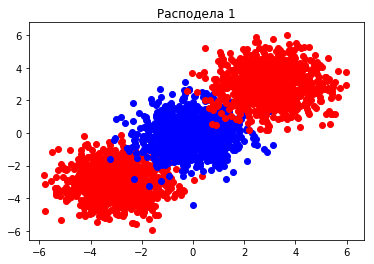

In [51]:
plt.scatter(X1[:1000,0],X1[:1000,1], c=u'r')
plt.scatter(X1[1000:2000,0],X1[1000:2000,1], c=u'b')
plt.scatter(X1[2000:3000,0],X1[2000:3000,1], c=u'r')
plt.title("Расподела 1")
plt.show()

In [52]:
ind = np.arange(len(X1))
np.random.shuffle(ind)

X1_obuc = X1[ind[:2500]]
y1_obuc = y1[ind[:2500]]

X1_ispit = X1[ind[2500:]]
y1_ispit = y1[ind[2500:]]

In [53]:
#Ucitavanje modela
model = ka.models.Sequential() #ucitavamo model tj. vrstu NM, u ovom slucaju je sekvencijalna (sa slojevima)

#Dodavanje slojeva
#model.add(funkcija) -> dodaje nov sloj u NM, funkcija blize definise NM
#model.add(ka.layers.Dense(izlazna_dimenzionlanost,input_dim = koliko_ulaznih_prom, activation='aktivaciona_fja'))
#Dense znaci da se svaki neuron povezuje sa svakim neuronom
model.add(ka.layers.Dense(12,input_dim = 2, activation='relu')) #0 do x=0 zatim x=y, сваки неурон је везан са осталих 12
model.add(ka.layers.Dense(1, activation = 'sigmoid')) #ovako izgleda izlazni sloj, ima 1 neuron jer imamo samo 2 klase

#Izgradnja modela
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Obucavanje modela epoch predstavlja broj iteracija
model.fit(X1_obuc,y1_obuc,epochs=40,batch_size=10)

#Ocenjivanje modela
ocena = model.evaluate(X1_obuc,y1_obuc)

Epoch 1/40
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6612 - acc: 0.5308

In [54]:
print("Тачност модела износи",ocena[1]*100,"%")

Тачност модела износи 97.44 %


In [55]:
#Ispitivanje NM na skupu za ispitivanje
y1_predvidjanje = np.round(model.predict(X1_ispit))
print("Тачност НМ на скупу за испитивање износи:",sum(y1_predvidjanje.reshape(len(y1_predvidjanje))==y1_ispit)/len(y1_predvidjanje)*100,"%")

Тачност НМ на скупу за испитивање износи: 98.0 %


In [56]:
#Klasifikacija proizvoljne tacke
a=np.arange(2)
a[:]=[-6,-6]
a=a.reshape(2,1)
a=a.T
print("Тачка припада",int(np.round(model.predict(a))),". класи")

Тачка припада 0 . класи


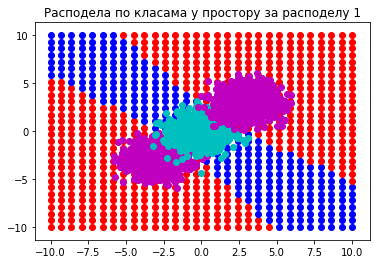

In [57]:
x_prostor = np.linspace(-10,10,50)
y_prostor = np.linspace(-10,10,50)
for i in range(len(x_prostor)):
    for j in range(len(y_prostor)):
        ispit = np.array([[x_prostor[i],y_prostor[j]]])
        predv = np.round(model.predict(ispit))
        if predv == 0:
            plt.scatter(x_prostor[i],y_prostor[j],c=u'r')
        else:
            plt.scatter(x_prostor[i],y_prostor[j],c=u'b')
            
plt.title("Расподела по класама у простору за расподелу 1")
plt.scatter(X1[:1000,0],X1[:1000,1], c=u'm')
plt.scatter(X1[1000:2000,0],X1[1000:2000,1], c=u'c')
plt.scatter(X1[2000:3000,0],X1[2000:3000,1], c=u'm')
plt.show()

In [ ]:
#б) 

In [3]:
pp1 = 3
s1 = 0.5
pp2 = 4
s2 = 0.3
pp3 = 0.8
t = np.linspace(0,np.pi,1000)
X2 = np.vstack([
    np.vstack([pp1*np.cos(2*np.pi*t)+s1*np.random.randn(1000),pp1*np.sin(2*np.pi*t)+s1*np.random.randn(1000)]).T,
    np.vstack([pp2*np.cos(2*np.pi*t)+s2*np.random.randn(1000),pp2*np.sin(2*np.pi*t)+s2*np.random.randn(1000)]).T,
    np.vstack([pp3*np.random.randn(1000),pp3*np.random.randn(1000)]).T
    ])

y2 = np.zeros(len(X2))
y2[:1000] = 2
y2[1000:2000] = 1
y2[2000:] = 3

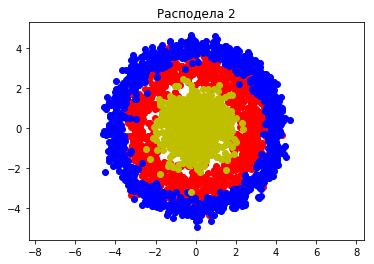

In [4]:
plt.scatter(X2[:1000,0],X2[:1000,1], c=u'r')
plt.scatter(X2[1000:2000,0],X2[1000:2000,1], c=u'b')
plt.scatter(X2[2000:,0],X2[2000:,1], c=u'y')
plt.title("Расподела 2")
plt.axis('equal')
plt.show()

In [5]:
def osnovni_model():
        model = ka.models.Sequential()
        model.add(ka.layers.Dense(19,input_dim = 2, activation='relu')) #input_dim je 2 jer imamo 2D raspodelu!
        model.add(ka.layers.Dense(3, activation='softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        return model

In [7]:
ind2 = np.arange(len(X2))
np.random.shuffle(ind2)

X2_obuc = X2[ind2[:2500]]
y2_obuc = y2[ind2[:2500]]

X2_ispit = X2[ind2[2500:]]
y2_ispit = y2[ind2[2500:]]



In [8]:
from sklearn.preprocessing import LabelEncoder
enkoder = LabelEncoder()
enkoder.fit(y2_obuc)
enk_y2_obuc = enkoder.transform(y2_obuc)

In [9]:
dami = ka.utils.to_categorical(enk_y2_obuc)

In [10]:
dami

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier (build_fn = osnovni_model, epochs=3, batch_size=5, verbose=0)

from sklearn.model_selection import KFold
kfold = KFold(n_splits = 9, shuffle = True, random_state = 7)

from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator, X2_obuc, dami, cv=kfold)

In [12]:
estimator.fit(X2_obuc,enk_y2_obuc)

In [13]:
print ("Прецизност износи %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100) )

Прецизност износи 78.80% (5.15%)


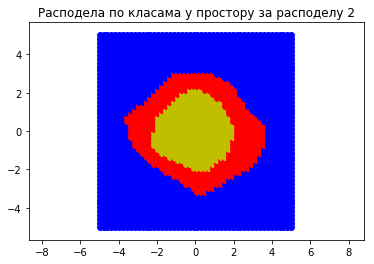

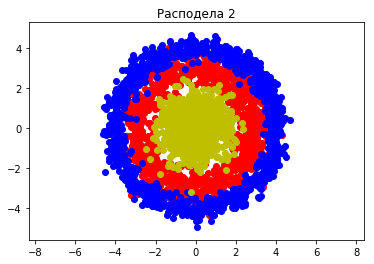

In [14]:
x_prostor2 = np.linspace(-5,5,50)
y_prostor2 = np.linspace(-5,5,50)
for i in range(len(x_prostor2)):
    for j in range(len(y_prostor2)):
        ispit2 = np.array([[x_prostor2[i],y_prostor2[j]]])
        predv2 = np.round(estimator.predict(ispit2))
        if predv2 == 0:
            plt.scatter(x_prostor2[i],y_prostor2[j],c=u'b')
        elif predv2 == 1:
            plt.scatter(x_prostor2[i],y_prostor2[j],c=u'r')
        elif predv2 == 2:
            plt.scatter(x_prostor2[i],y_prostor2[j],c=u'y')
            
plt.title("Расподела по класама у простору за расподелу 2")
plt.axis('equal')
plt.show()

plt.title("Расподелa 2")
plt.axis('equal')
plt.scatter(X2[:1000,0],X2[:1000,1], c=u'r')
plt.scatter(X2[1000:2000,0],X2[1000:2000,1], c=u'b')
plt.scatter(X2[2000:,0],X2[2000:,1], c=u'y')
plt.show()

Тачке редом припадају [0 1 2]  класи.


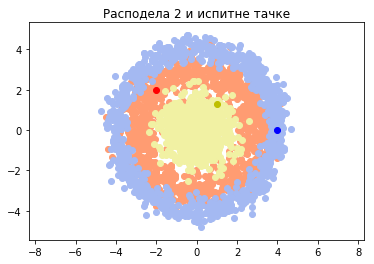

In [95]:
#plava je 0. klasa, crvena je 1. klasa, zuta je 2. klasa
ispit3 = np.array([[4,0],[-2,2],[1,1.3]])
predv3 = np.round(estimator.predict(ispit3))
print("Тачке редом припадају",predv3," класи.")

plt.title("Расподелa 2 и испитне тачке")
plt.axis('equal')
plt.scatter(X2[:1000,0],X2[:1000,1], c=u'#ff9c72')
plt.scatter(X2[1000:2000,0],X2[1000:2000,1], c=u'#a4b9f2')
plt.scatter(X2[2000:,0],X2[2000:,1], c=u'#f1f1a3')

plt.scatter(ispit3[0,0],ispit3[0,1], c=u'b')
plt.scatter(ispit3[1,0],ispit3[1,1], c=u'r')
plt.scatter(ispit3[2,0],ispit3[2,1], c=u'y')

plt.show()

In [15]:
y2_predvidjanje = np.round(estimator.predict(X2_ispit))

In [20]:
print("Тачност НМ на скупу за испитивање износи:",sum(y2_predvidjanje==y2_ispit-1)/len(y2_predvidjanje)*100,"%")

Тачност НМ на скупу за испитивање износи: 83.39999999999999 %


In [42]:
pp21 = 3
s21 = 0.5
pp22 = 4
s22 = 0.3
pp23 = 5
s23 = 0.3
t2 = np.linspace(0,np.pi,1000)
X3 = np.vstack([
    np.vstack([pp21*np.cos(2*np.pi*t)+s21*np.random.randn(1000),pp21*np.sin(2*np.pi*t)+s21*np.random.randn(1000)]).T,
    np.vstack([pp22*np.cos(2*np.pi*t)+s22*np.random.randn(1000),pp22*np.sin(2*np.pi*t)+s22*np.random.randn(1000)]).T,
    np.vstack([pp23*np.cos(2*np.pi*t)+s23*np.random.randn(1000),pp23*np.sin(2*np.pi*t)+s23*np.random.randn(1000)]).T
    ])

y3 = np.zeros(len(X2))
y3[:1000] = 2
y3[1000:2000] = 1
y3[2000:] = 1

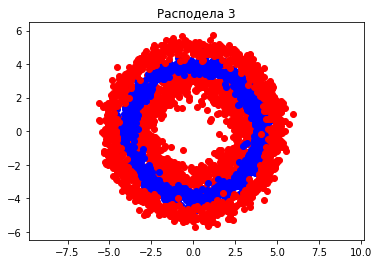

In [43]:
plt.scatter(X3[:1000,0],X3[:1000,1], c=u'r')
plt.scatter(X3[1000:2000,0],X3[1000:2000,1], c=u'b')
plt.scatter(X3[2000:,0],X3[2000:,1], c=u'r')
plt.title("Расподела 3")
plt.axis('equal')
plt.show()

In [44]:
X4 = np.vstack([
    np.vstack([np.random.rand(100),np.random.rand(100)]).T,
    np.vstack([np.random.rand(100)*(-1),np.random.rand(100)]).T,
    np.vstack([np.random.rand(100),np.random.rand(100)*(-1)]).T,
    np.vstack([np.random.rand(100)*(-1),np.random.rand(100)*(-1)]).T
])

y4 = np.zeros(len(X4))
y4[:100] = 1
y4[100:200] = 0
y4[200:300] = 0
y4[300:400] = 1

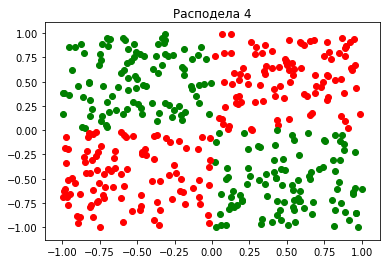

In [45]:
plt.scatter(X4[:100,0],X4[:100,1],c=u'r')
plt.scatter(X4[100:200,0],X4[100:200,1],c=u'g')
plt.scatter(X4[200:300,0],X4[200:300,1],c=u'g')
plt.scatter(X4[300:400,0],X4[300:400,1],c=u'r')
plt.title("Расподела 4")
plt.show()

In [46]:
pp31 = 1
k31x = -3
k31y = -3

pp32 = 1
k32x = 0
k32y = 0

pp33 = 1
k33x = 3
k33y = -3

pp34 = 1
k34x = 0
k34y = 5

X5 = np.vstack([
    np.vstack([pp31*np.random.randn(1000)+k31x,pp31*np.random.randn(1000)+k31y,]).T,
    np.vstack([pp32*np.random.randn(1000)+k32x,pp32*np.random.randn(1000)+k32y,]).T,
    np.vstack([pp33*np.random.randn(1000)+k33x,pp33*np.random.randn(1000)+k33y,]).T,
    np.vstack([pp34*np.random.randn(1000)+k34x,pp34*np.random.randn(1000)+k34y,]).T
])

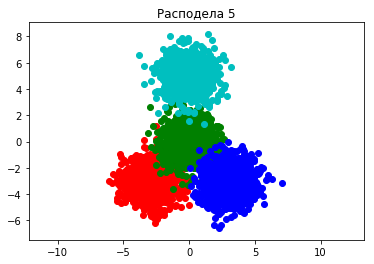

In [47]:
plt.scatter(X5[:1000,0],X5[:1000,1],c=u'r')
plt.scatter(X5[1000:2000,0],X5[1000:2000,1],c=u'g')
plt.scatter(X5[2000:3000,0],X5[2000:3000,1],c=u'b')
plt.scatter(X5[3000:4000,0],X5[3000:4000,1],c=u'c')
plt.axis('equal')
plt.title("Расподела 5")
plt.show()